# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [32]:
import pandas as pd
import os 

import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [123]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]
df_elec = df[elec_cols]
df_elec.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73


In [124]:
weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]
df_weat = df[weat_cols]
df_weat.head()

,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,4821,884,2.2,62.7,1.8,0.0,-1.0
2,4821,884,2.3,63.1,2.1,0.0,-0.6
3,4821,884,2.2,62.4,2.5,0.0,-1.3
4,4821,884,1.7,63.5,1.7,0.0,-0.2
5,4821,884,1.7,63.0,1.6,0.0,-0.8


In [125]:
reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]

df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


In [126]:
df_train = df[df['electric_train.tm'] < '2023-01-01']

targets = ['electric_train.sum_qctr', 'electric_train.n', 'electric_train.sum_load', 'electric_train.n_mean_load']

df_val = df[df['electric_train.tm'] >= '2023-01-01'].drop(targets, axis=1)
# df_val는 다른 features에서 계산을 통해 구한 후 채워넣야 할듯? <-- 훈련 데이터에서는 사용하기 때문 (내 생각.....)

In [127]:
target = 'electric_train.elec'

In [128]:
targets.append(target)
targets = ['electric_train.tm'] + targets


In [129]:
df_targets = df_train[targets]

df_targets

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,6950,11,526.24,68.606449,69.73
...,...,...,...,...,...,...
7593350,2022-12-31 19:00:00,34200,23,6851.72,225.461986,132.13
7593351,2022-12-31 20:00:00,34200,23,6779.84,225.461986,130.74
7593352,2022-12-31 21:00:00,34200,23,6802.40,225.461986,131.18
7593353,2022-12-31 22:00:00,34200,23,6706.68,225.461986,129.33


위 표를 통해 시간별 컬럼이 아닌 일별 컬럼을 분리해서 분포도를 확인해 보자 

In [130]:
df_3am = df_targets.iloc[2::24]

df_3am.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
3,2021-01-01 03:00:00,6950,11,597.48,68.606449,79.17
27,2021-01-02 03:00:00,6950,11,565.64,68.606449,74.95
51,2021-01-03 03:00:00,6950,11,561.52,68.606449,74.41
75,2021-01-04 03:00:00,6950,11,559.44,68.606449,74.13
99,2021-01-05 03:00:00,6950,11,540.80,68.606449,71.66


In [131]:
df_3am.iloc[:10]

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
3,2021-01-01 03:00:00,6950,11,597.48,68.606449,79.17
27,2021-01-02 03:00:00,6950,11,565.64,68.606449,74.95
51,2021-01-03 03:00:00,6950,11,561.52,68.606449,74.41
75,2021-01-04 03:00:00,6950,11,559.44,68.606449,74.13
99,2021-01-05 03:00:00,6950,11,540.80,68.606449,71.66
123,2021-01-06 03:00:00,6950,11,565.80,68.606449,74.97
147,2021-01-07 03:00:00,6950,11,597.52,68.606449,79.18
171,2021-01-08 03:00:00,6950,11,614.72,68.606449,81.46
195,2021-01-09 03:00:00,6950,11,633.12,68.606449,83.89
219,2021-01-10 03:00:00,6950,11,608.88,68.606449,80.68


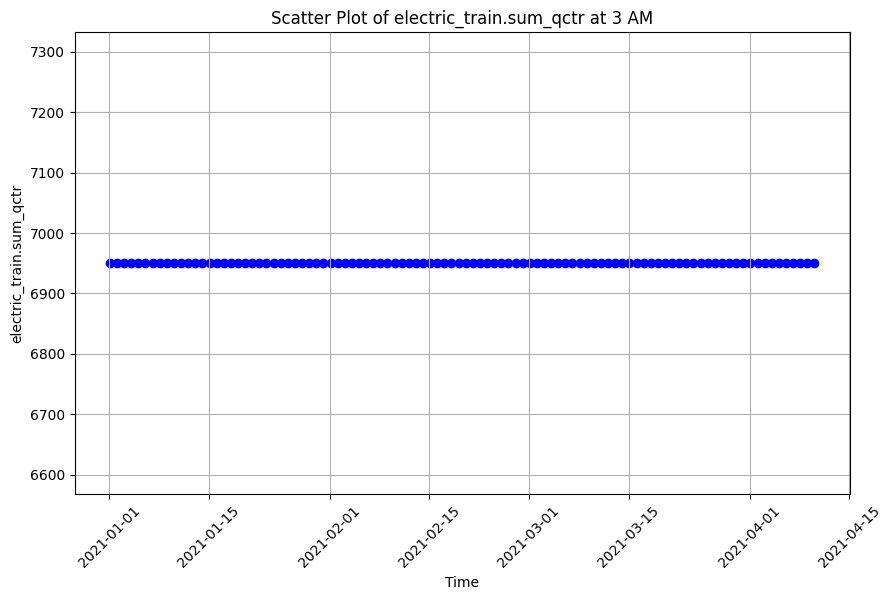

In [132]:
df_3am = df_targets.iloc[2::24]

df_3am = df_3am.iloc[:100]

plt.figure(figsize=(10, 6))
plt.scatter(df_3am['electric_train.tm'], df_3am['electric_train.sum_qctr'], color='blue')
plt.title('Scatter Plot of electric_train.sum_qctr at 3 AM')
plt.xlabel('Time')
plt.ylabel('electric_train.sum_qctr')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [136]:
df_3am = df_targets[df_targets['electric_train.tm'].dt.hour == 3]

a= df_3am[df_3am['electric_train.tm'].between('2021-01-01','2021-01-02')]

In [137]:
a.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
3,2021-01-01 03:00:00,6950,11,597.48,68.606449,79.17
17547,2021-01-01 03:00:00,36690,49,3125.20,81.052601,78.69
43851,2021-01-01 03:00:00,18250,20,1519.56,95.383732,79.66
70155,2021-01-01 03:00:00,14700,11,2094.40,244.335917,77.93
78915,2021-01-01 03:00:00,5850,10,514.04,65.476580,78.51


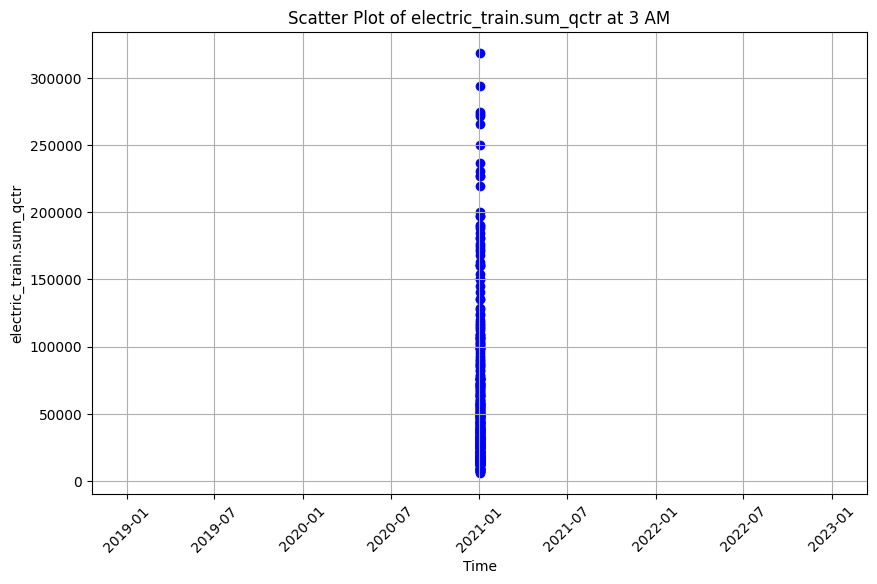

In [138]:

plt.figure(figsize=(10, 6))
plt.scatter(a['electric_train.tm'], a['electric_train.sum_qctr'], color='blue')
plt.title('Scatter Plot of electric_train.sum_qctr at 3 AM')
plt.xlabel('Time')
plt.ylabel('electric_train.sum_qctr')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [139]:
len(a)

299

### 여기까지 분석 결과 

같은 날 같은 시각에 299곳의 지역에서 데이터가 측정된거 같다 


공동주택 수 n_1을 가진 격자 1의 2021년부터 2023년까지 데이터가 있고 

다음 공동주택 수 n_2을 가진 격자 2의 2021년부터 2023년까지 데이터가 있고.... 이런 식인거 같음





In [140]:
a= df_targets[df_targets['electric_train.tm'].between('2021-01-01','2021-01-01')]

a.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
17544,2021-01-01,42250,58,5067.40,79.776051,109.52
43848,2021-01-01,16750,19,2219.20,97.138634,120.24
70152,2021-01-01,14600,11,2990.32,241.745562,112.45
113976,2021-01-01,16100,14,3164.28,186.873616,120.95
122760,2021-01-01,7750,10,1829.08,156.399551,116.95


In [141]:
idx = a.index.tolist()

idx[:10]

[17544, 43848, 70152, 113976, 122760, 149064, 175368, 192912, 219216, 245520]

In [142]:
df_targets.iloc[:idx[0]-1]

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,6950,11,526.24,68.606449,69.73
...,...,...,...,...,...,...
17539,2020-12-31 19:00:00,42250,58,6193.00,79.776051,133.84
17540,2020-12-31 20:00:00,42250,58,6133.00,79.776051,132.55
17541,2020-12-31 21:00:00,42250,58,6006.80,79.776051,129.82
17542,2020-12-31 22:00:00,42250,58,5806.84,79.776051,125.50


In [112]:
df_targets.iloc[idx[0]-1:idx[1]-2]

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
17544,2021-01-01 00:00:00,42250,58,5067.40,79.776051,109.52
17545,2021-01-01 01:00:00,36690,49,3821.20,81.052601,96.21
17546,2021-01-01 02:00:00,36690,49,3480.76,81.052601,87.64
17547,2021-01-01 03:00:00,36690,49,3125.20,81.052601,78.69
17548,2021-01-01 04:00:00,36690,49,2912.64,81.052601,73.34
...,...,...,...,...,...,...
43843,2020-12-31 19:00:00,16750,19,2722.28,97.138634,147.50
43844,2020-12-31 20:00:00,16750,19,2727.80,97.138634,147.80
43845,2020-12-31 21:00:00,16750,19,2584.72,97.138634,140.05
43846,2020-12-31 22:00:00,16750,19,2671.16,97.138634,144.73


In [143]:
df_targets_sorted = df_targets.sort_values(by='electric_train.tm')

df_targets_sorted.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
2647991,2020-01-01 01:00:00,63850,39,9732.96,250.490543,99.63
5208382,2020-01-01 01:00:00,14750,20,2401.12,116.010234,103.49
5182078,2020-01-01 01:00:00,71630,32,12139.16,363.252769,104.43
5155774,2020-01-01 01:00:00,45840,28,6723.84,225.924357,106.29
1280137,2020-01-01 01:00:00,76450,44,12949.24,287.250770,102.45


In [146]:
df_daily = df_targets.iloc[0::24]

df_daily.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,6950,11,751.32,68.606449,99.56
25,2021-01-02 01:00:00,6950,11,707.48,68.606449,93.75
49,2021-01-03 01:00:00,6950,11,720.96,68.606449,95.53
73,2021-01-04 01:00:00,6950,11,683.56,68.606449,90.58
97,2021-01-05 01:00:00,6950,11,715.40,68.606449,94.80


In [148]:
df_daily.tail()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
7593243,2022-12-27 08:00:00,34200,23,5858.48,225.461986,112.98
7593267,2022-12-28 08:00:00,34200,23,5771.92,225.461986,111.31
7593291,2022-12-29 08:00:00,34200,23,5880.28,225.461986,113.40
7593315,2022-12-30 08:00:00,34200,23,5831.36,225.461986,112.45
7593339,2022-12-31 08:00:00,34200,23,5140.00,225.461986,99.12


In [147]:
df_targets_sorted = df_daily.sort_values(by='electric_train.tm')

df_targets_sorted.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
8761,2020-01-01 01:00:00,42250,58,4468.72,79.776051,96.58
1359048,2020-01-01 01:00:00,93550,60,14265.44,240.720412,98.77
4743670,2020-01-01 01:00:00,33850,23,6082.40,256.103673,103.26
6085221,2020-01-01 01:00:00,43200,40,8183.36,190.687836,107.29
4094854,2020-01-01 01:00:00,48314,38,7153.68,187.758816,100.26


In [152]:
df_daily_2021 = df_daily[df_daily['electric_train.tm'].between('2021-01-01','2022-01-01')]

df_daily_2021.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,6950,11,751.32,68.606449,99.56
25,2021-01-02 01:00:00,6950,11,707.48,68.606449,93.75
49,2021-01-03 01:00:00,6950,11,720.96,68.606449,95.53
73,2021-01-04 01:00:00,6950,11,683.56,68.606449,90.58
97,2021-01-05 01:00:00,6950,11,715.40,68.606449,94.80


In [153]:
df_daily_2021.tail()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
7584483,2021-12-27 08:00:00,35500,30,5914.04,172.15479,114.51
7584507,2021-12-28 08:00:00,35500,30,5837.08,172.15479,113.02
7584531,2021-12-29 08:00:00,35500,30,5703.20,172.15479,110.43
7584555,2021-12-30 08:00:00,35500,30,5882.76,172.15479,113.90
7584579,2021-12-31 08:00:00,35500,30,5942.92,172.15479,115.07


?? 왜 1시부터 24시간 단위로 뽑아온 데이터에 8시가 있지?

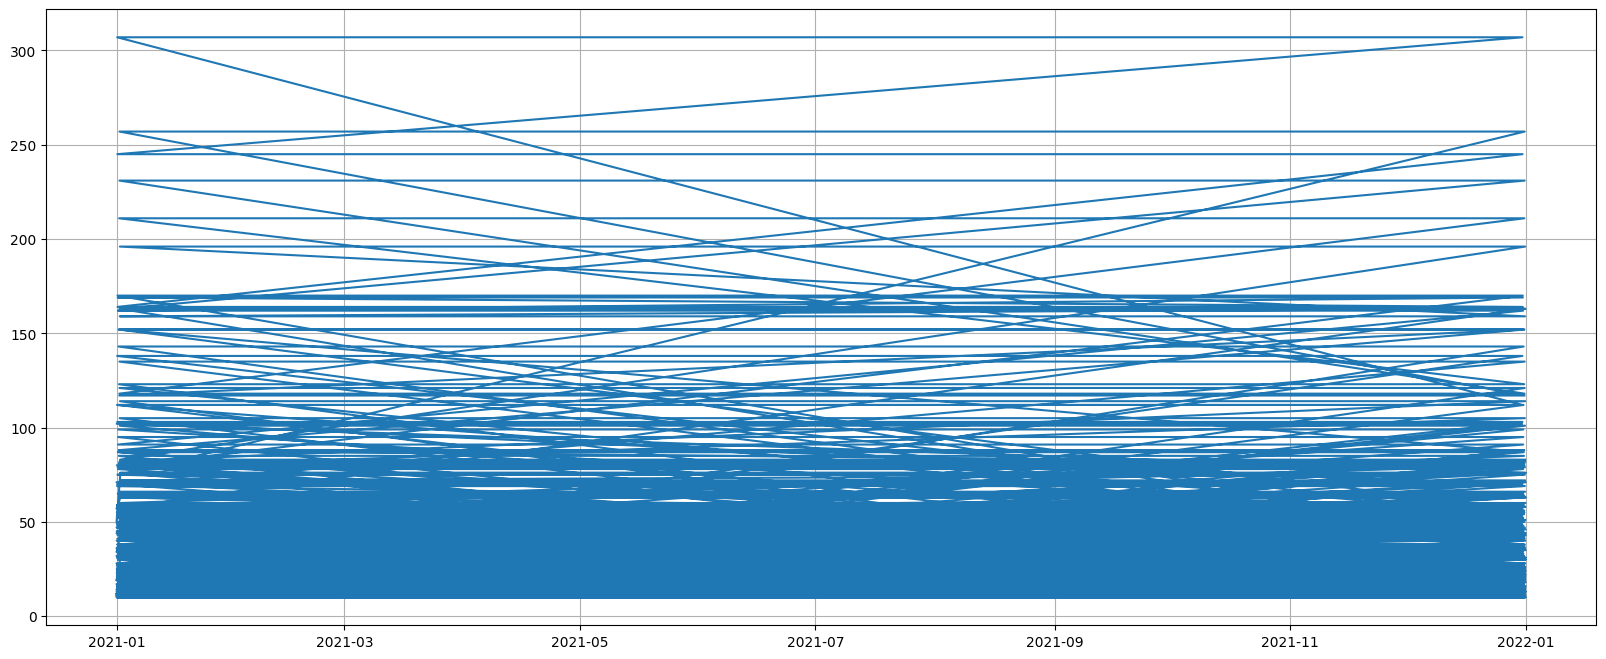

In [154]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.n', data = df_daily_2021)
plt.grid()
plt.show()

# df_daily_2021 안에서도 같은 요일과 시간을 갖는 데이터가 있나봄 

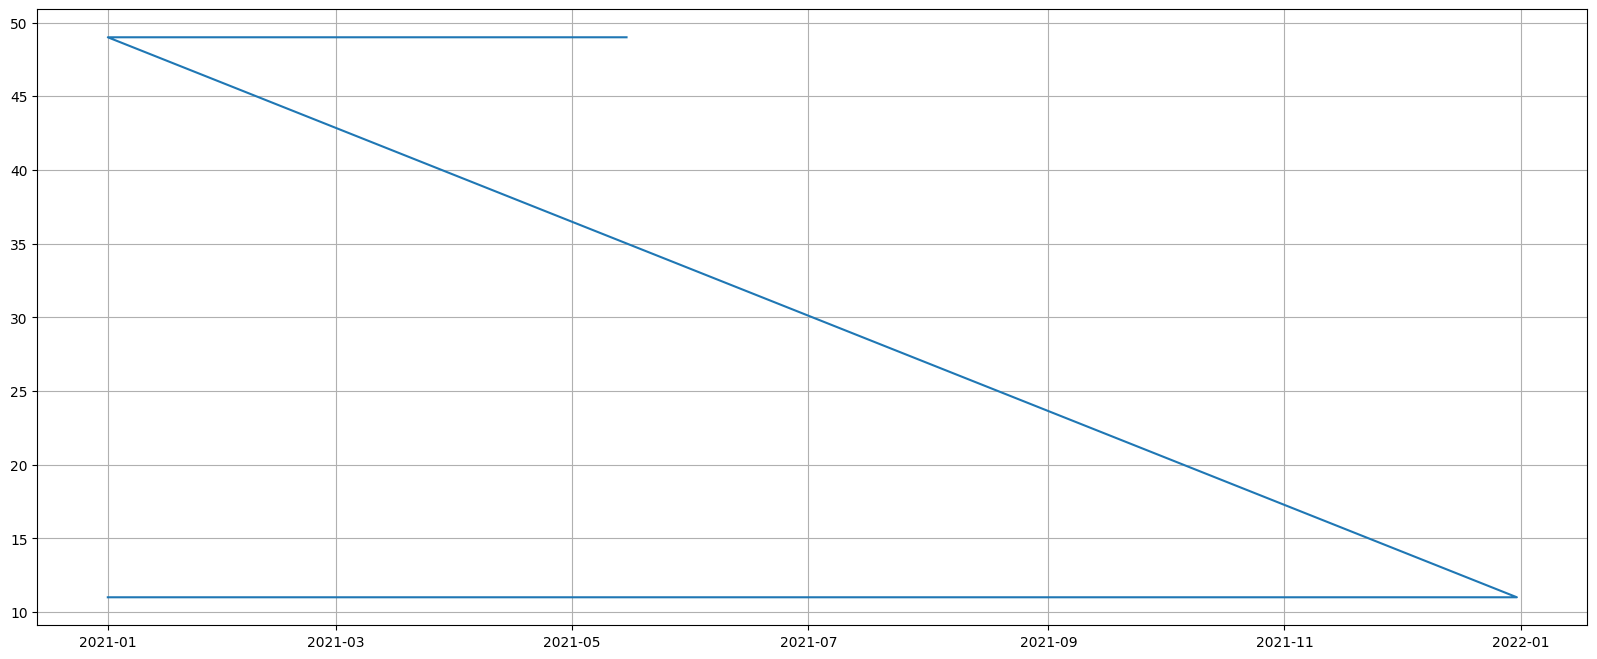

In [158]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.n', data = df_daily_2021.iloc[:500])
plt.grid()
plt.show()

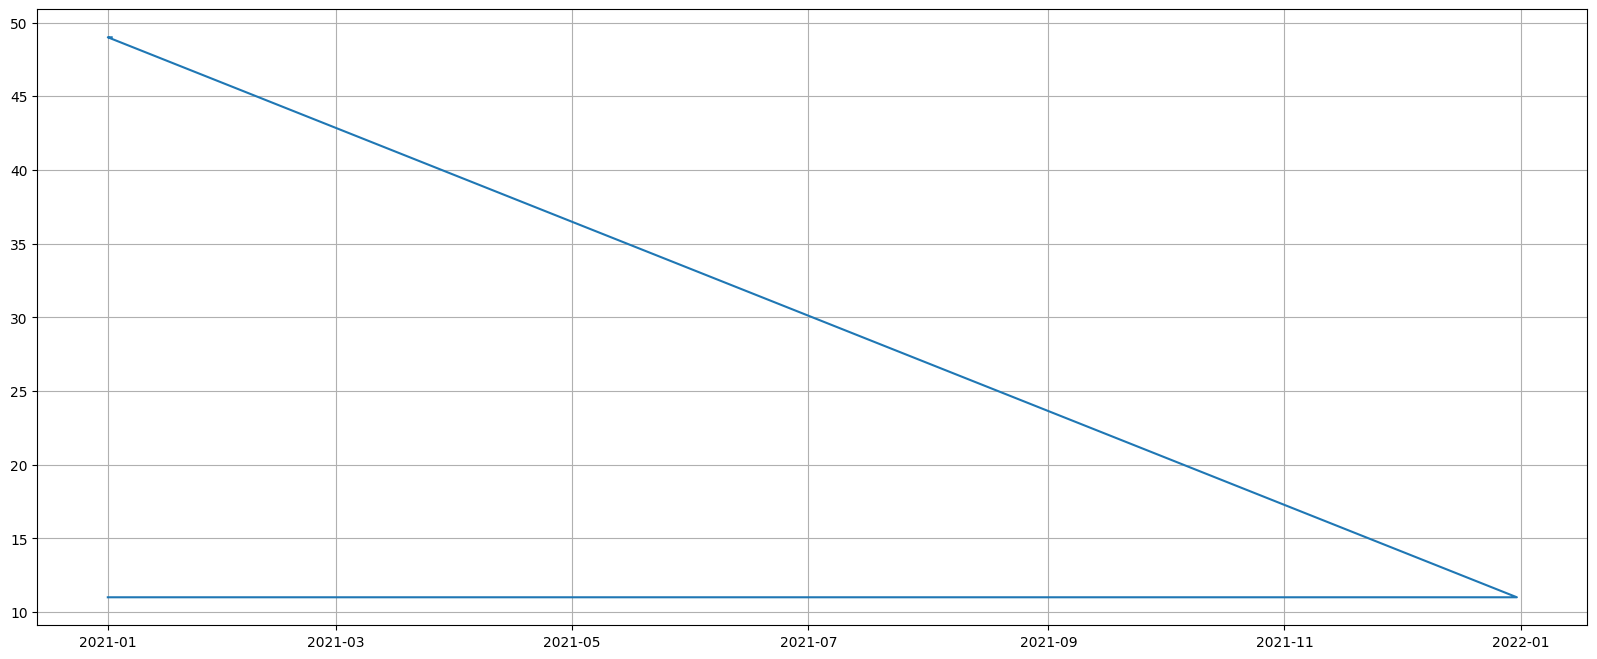

In [166]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.n', data = df_daily_2021.iloc[:367])
plt.grid()
plt.show()

In [167]:
df_daily_2021.iloc[:367].tail()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
8689,2021-12-29 01:00:00,6950,11,699.12,68.606449,92.64
8713,2021-12-30 01:00:00,6950,11,697.04,68.606449,92.36
8737,2021-12-31 01:00:00,6950,11,714.48,68.606449,94.67
17545,2021-01-01 01:00:00,36690,49,3821.20,81.052601,96.21
17569,2021-01-02 01:00:00,36690,49,3576.64,81.052601,90.06


In [170]:
changes = df_daily_2021['electric_train.n'] != df_daily_2021['electric_train.n'].shift(1)
changed_rows = df_daily_2021[changes]

In [171]:
changed_rows

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,6950,11,751.32,68.606449,99.56
17545,2021-01-01 01:00:00,36690,49,3821.20,81.052601,96.21
43850,2021-01-01 02:00:00,18250,20,1711.92,95.383732,89.74
70155,2021-01-01 03:00:00,14700,11,2094.40,244.335917,77.93
78915,2021-01-01 03:00:00,5850,10,514.04,65.476580,78.51
...,...,...,...,...,...,...
7461839,2021-01-01 04:00:00,57378,26,4430.92,205.198658,83.05
7496928,2021-01-01 05:00:00,27450,20,3947.32,241.794729,81.63
7523233,2021-01-01 06:00:00,25500,23,3965.24,208.450644,82.71
7549538,2021-01-01 07:00:00,33100,24,5250.20,255.292719,85.69


아 첫행이 1시부터 시작하는데, 다음 격자들은 0시부터 시작해서 그런가봐

In [185]:
df_daily_2021.loc[26281:43850]

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
26281,2021-12-31 01:00:00,36690,49,3945.32,81.052601,99.34
43850,2021-01-01 02:00:00,18250,20,1711.92,95.383732,89.74


In [188]:
df_targets.loc[43850-3:43850+3]

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
43847,2020-12-31 23:00:00,16750,19,2414.96,97.138634,130.85
43848,2021-01-01 00:00:00,16750,19,2219.20,97.138634,120.24
43849,2021-01-01 01:00:00,18250,20,1924.00,95.383732,100.86
43850,2021-01-01 02:00:00,18250,20,1711.92,95.383732,89.74
43851,2021-01-01 03:00:00,18250,20,1519.56,95.383732,79.66
43852,2021-01-01 04:00:00,18250,20,1438.56,95.383732,75.41
43853,2021-01-01 05:00:00,18250,20,1371.04,95.383732,71.87


In [204]:
df_23 = df_targets[df_targets['electric_train.tm'].dt.hour == 23]

df_daily_2021 = df_23[df_23['electric_train.tm'].between('2021-01-01','2022-01-01')]

df_daily_2021.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
23,2021-01-01 23:00:00,6950,11,882.56,68.606449,116.95
47,2021-01-02 23:00:00,6950,11,886.52,68.606449,117.47
71,2021-01-03 23:00:00,6950,11,909.40,68.606449,120.50
95,2021-01-04 23:00:00,6950,11,956.72,68.606449,126.77
119,2021-01-05 23:00:00,6950,11,927.88,68.606449,122.95


In [205]:
changes = df_daily_2021['electric_train.n'] != df_daily_2021['electric_train.n'].shift(1)
changed_rows = df_daily_2021[changes]

changed_rows

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
23,2021-01-01 23:00:00,6950,11,882.56,68.606449,116.95
17567,2021-01-01 23:00:00,36690,49,4257.60,81.052601,107.20
43871,2021-01-01 23:00:00,18250,20,2160.00,95.383732,113.23
70175,2021-01-01 23:00:00,14700,11,3196.08,244.335917,118.92
78935,2021-01-01 23:00:00,5850,10,761.08,65.476580,116.24
...,...,...,...,...,...,...
7461858,2021-01-01 23:00:00,57378,26,6879.56,205.198658,128.95
7496946,2021-01-01 23:00:00,27450,20,5998.28,241.794729,124.04
7523250,2021-01-01 23:00:00,25500,23,6109.72,208.450644,127.44
7549554,2021-01-01 23:00:00,33100,24,7625.08,255.292719,124.45


In [206]:
split_idx = changed_rows.index.to_list()

split_idx[:10]

[23, 17567, 43871, 70175, 78935, 149087, 175391, 192935, 219239, 245543]

In [207]:
df_daily_2021.loc[:split_idx[1]+2].tail()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
8687,2021-12-28 23:00:00,6950,11,992.32,68.606449,131.49
8711,2021-12-29 23:00:00,6950,11,939.60,68.606449,124.50
8735,2021-12-30 23:00:00,6950,11,981.84,68.606449,130.10
8759,2021-12-31 23:00:00,6950,11,960.52,68.606449,127.28
17567,2021-01-01 23:00:00,36690,49,4257.60,81.052601,107.20


In [208]:
df_targets.loc[:8759]

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,6950,11,526.24,68.606449,69.73
...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,6950,11,985.72,68.606449,130.62
8756,2021-12-31 20:00:00,6950,11,990.64,68.606449,131.27
8757,2021-12-31 21:00:00,6950,11,994.92,68.606449,131.83
8758,2021-12-31 22:00:00,6950,11,984.72,68.606449,130.48


In [209]:
df_targets.loc[:8761]

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,6950,11,526.24,68.606449,69.73
...,...,...,...,...,...,...
8757,2021-12-31 21:00:00,6950,11,994.92,68.606449,131.83
8758,2021-12-31 22:00:00,6950,11,984.72,68.606449,130.48
8759,2021-12-31 23:00:00,6950,11,960.52,68.606449,127.28
8760,2022-01-01 00:00:00,6950,11,853.12,68.606449,113.05


In [210]:
df_targets_sorted.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
8761,2020-01-01 01:00:00,42250,58,4468.72,79.776051,96.58
1359048,2020-01-01 01:00:00,93550,60,14265.44,240.720412,98.77
4743670,2020-01-01 01:00:00,33850,23,6082.40,256.103673,103.26
6085221,2020-01-01 01:00:00,43200,40,8183.36,190.687836,107.29
4094854,2020-01-01 01:00:00,48314,38,7153.68,187.758816,100.26


In [211]:
df_1am = df_targets_sorted[df_targets_sorted['electric_train.tm'].dt.hour == 1]
a= df_1am[df_1am['electric_train.tm'].between('2020-01-01','2020-01-02')]

In [213]:
a.tail()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
3358247,2020-01-01 01:00:00,35200,20,4665.08,240.205025,97.11
7374140,2020-01-01 01:00:00,18700,15,3442.28,213.835444,107.32
6698972,2020-01-01 01:00:00,33098,18,4166.32,222.808245,103.88
5383749,2020-01-01 01:00:00,45450,27,7059.36,253.154734,103.28
2700599,2020-01-01 01:00:00,66650,42,11777.20,275.785129,101.68


In [214]:
len(a)

13

In [217]:
df_targets_sorted.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
8761,2020-01-01 01:00:00,42250,58,4468.72,79.776051,96.58
1359048,2020-01-01 01:00:00,93550,60,14265.44,240.720412,98.77
4743670,2020-01-01 01:00:00,33850,23,6082.40,256.103673,103.26
6085221,2020-01-01 01:00:00,43200,40,8183.36,190.687836,107.29
4094854,2020-01-01 01:00:00,48314,38,7153.68,187.758816,100.26


In [219]:
df_1am = df_targets_sorted[df_targets_sorted['electric_train.tm'].dt.hour == 0]
a= df_1am[df_1am['electric_train.tm'].between('2020-01-01','2020-01-02')]

a.head()

,electric_train.tm,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
6041396,2020-01-02,14450,12,2581.84,194.044603,110.88
6672691,2020-01-02,94380,34,16103.16,427.819681,110.71
5357468,2020-01-02,36225,36,7810.12,196.694621,110.30
3331966,2020-01-02,36190,19,6433.28,311.868986,108.57
4042245,2020-01-02,21940,10,3128.68,286.638863,109.15
